In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import re
import heartpy as hp
from scipy import signal


In [30]:
eeg_data_pathes = glob.glob("/Users/miyakooti/repositories/arai_MATLAB_program/csv/?_*/EEG/filtered_data_?_*.csv")
eeg_data_pathes.sort()
eeg_data_pathes

['/Users/miyakooti/repositories/arai_MATLAB_program/csv/0_kumakura/EEG/filtered_data_0_kumakura_rest.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/0_kumakura/EEG/filtered_data_1_kumakura_practice.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/0_kumakura/EEG/filtered_data_2_kumakura_boredom.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/0_kumakura/EEG/filtered_data_3_kumakura_flow.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/0_kumakura/EEG/filtered_data_4_kumakura_flow_ultra.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/0_kumakura/EEG/filtered_data_5_kumakura_overload.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/1_kim/EEG/filtered_data_0_kim_rest.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/1_kim/EEG/filtered_data_1_kim_practice.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/1_kim/EEG/filtered_data_2_kim_boredom.csv',
 '/Users/miyakooti/repositories/arai_MATLAB

In [31]:
def bandpass(wave, fs, fe1, fe2, n):
    nyq = fs / 2.0
    b, a = signal.butter(1, [fe1/nyq, fe2/nyq], btype='band')
    for i in range(0, n):
        wave = signal.filtfilt(b, a, wave)
    return wave

In [32]:
df = pd.read_csv(eeg_data_pathes[0])
df.head()

,FpZ,FC3,FC4,FcZ,O1,O2,Fp2,V6
0,0.017936,-0.000747,0.009715,-0.007473,0.010463,0.006726,0.008968,-0.035125
1,0.161625,-0.007482,0.083810,-0.068091,0.095029,0.062104,0.080813,-0.311285
2,0.701763,-0.033733,0.346450,-0.297641,0.418338,0.277377,0.348640,-1.324904
3,1.980105,-0.093846,0.928661,-0.842185,1.204629,0.807567,0.968355,-3.658739
4,4.127889,-0.185395,1.848760,-1.758193,2.579781,1.739434,1.962382,-7.471378


In [33]:
len(df[["FC3"]])

156358

In [34]:
testdf_filterd = bandpass(testdf[["FC3"]], 500, 1, 49, 3)

ValueError: The length of the input vector x must be greater than padlen, which is 9.

### フーリエ変換

<BarContainer object of 75000 artists>

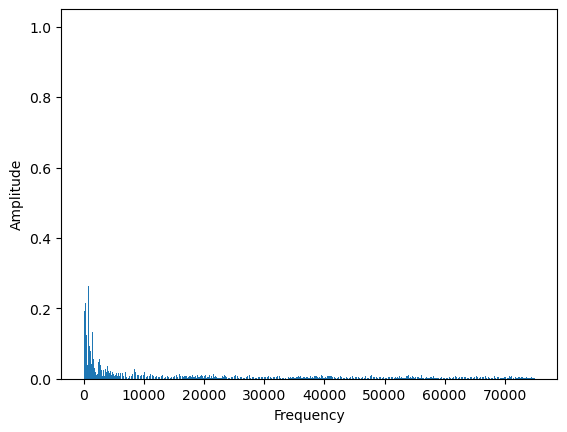

In [28]:
# 窓関数
# hw = np.hamming(len(testdf*500)) #ハミング窓
# windowData = hw * testdf[["FC3"]]

N = 500 * 300

# フーリエ変換
F = np.fft.fft(testdf["FC3"])
F_abs = np.abs(F)

# プロット
left = np.arange(int(N/2))
height = F_abs[0:int(N/2)] / np.max(F_abs)
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.bar(left, height)


### 研究のための脳波知識
https://www.miyuki-net.co.jp/jp/web_seminar/solveBrainfunc/

### 参考文献たち
- [脳波データをフーリエ解析](https://mukai-lab.info/pages/tech/emotiv/emotiv3/)
- [バンドパスフィルタはちゃんとかけましょう。相馬さんは1-49Hz](https://atatat.hatenablog.com/entry/data_proc_python5)